## 의존성 패키지 설치

pip install -U pandas

pip install lightgbm

pip install -U scikit-learn

pip install seaborn

pip install matplotlib

pip install imblearn

pip install catboost

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

### 실습 데이터 - Credit Card Fraud Detection Data
- 데이터 설명 및 다운로드: https://www.kaggle.com/mlg-ulb/creditcardfraud
- 28개의 컬럼으로 구성
    - 28개의 변수(feature) 의미: Features V1, V2, … V28 are the principal components obtained with PCA.
    - 다양한 데이터를 가지고 
- Feature 'Amount': the transaction Amount
- Feature 'Class': the response variable and it takes value 1 in case of fraud and 0 otherwise.
    $\to$ 타겟 feature, Class (0, 1 ; 이진분류)

In [2]:
data=pd.read_csv("./creditcard.csv")
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### 불필요한 데이터 제거

In [3]:
data=data.drop(['Time','Amount'],axis=1)
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,0


In [4]:
# 데이터 내 NA값 여부 확인
data.isnull() # NA 확인
data.isnull().any() # 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool


### 데이터 구조 확인

In [5]:
data.shape

(284807, 29)

In [6]:
data['V1']

0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
            ...    
284802   -11.881118
284803    -0.732789
284804     1.919565
284805    -0.240440
284806    -0.533413
Name: V1, Length: 284807, dtype: float64

In [7]:
data_feature = data.drop(['Class'], axis=1)

In [8]:
col_names = data_feature.columns

In [9]:
col_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

### 데이터 분포 형태 확인

In [10]:
data_feature = data_feature[:10]

In [11]:
data_feature

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076


In [12]:
data_feature['V1'].max()

1.22965763450793

In [13]:
data_feature['V1'].min()

-1.3598071336738

In [14]:
data_feature

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076


Text(0, 0.5, 'Feature Values')

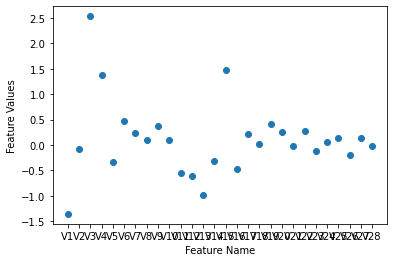

In [15]:
plt.plot()
y = data_feature.iloc[0]
x = np.arange(len(y))
plt.scatter(x, y)
labels = data_feature.columns
plt.xticks(x, labels)
plt.xlabel('Feature Name')
plt.ylabel('Feature Values')

Text(0, 0.5, 'Feature Values')

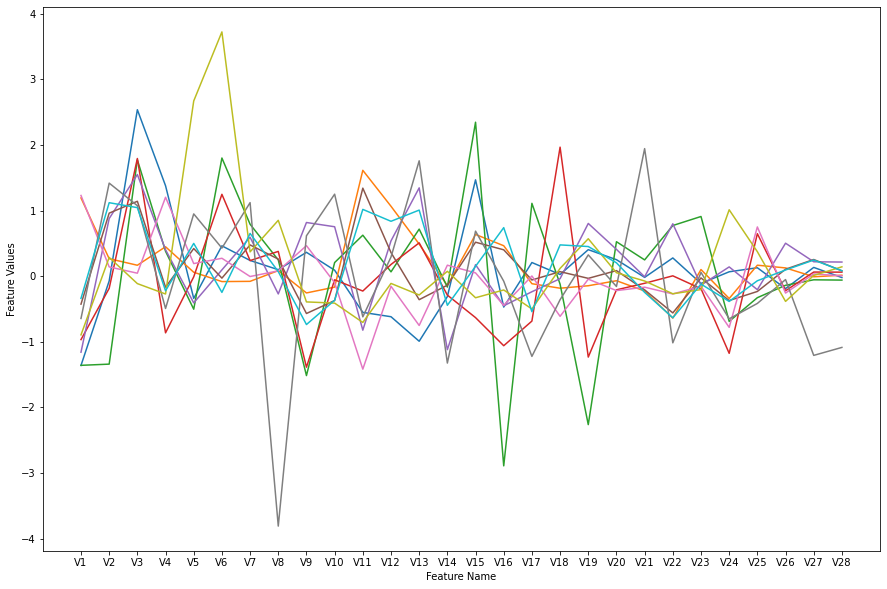

In [16]:
plt.rcParams["figure.figsize"] = (15,10)
plt.plot()
#plt.scatter(data_feature['V1'], data_feature['V1'])
for x in range(data_feature.shape[0]):
    y = data_feature.iloc[x]
    x = np.arange(len(y))
    #plt.scatter(x, y)
    plt.plot(x, y)
labels = data_feature.columns
plt.xticks(x, labels)
plt.xlabel('Feature Name')
plt.ylabel('Feature Values')

### 데이터 기본 통계 확인 (Summary)

In [17]:
data.describe() 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


### collection 패키지의 Counter 모듈을 이용해서 클래스 비율 확인
- 컨테이너에 동일한 값의 자료가 몇 개인지를 파악하는데 사용하는 객체
- Class Imbalance 정도 확인

In [18]:
# 타겟 변수(feature)의 분포 확인
from collections import Counter
class_count = Counter(data.Class)
print(class_count)
IR = class_count.get(0) / class_count.get(1)
print('IR (Class Imbalance Ratio): {}'.format(IR))

Counter({0: 284315, 1: 492})
IR (Class Imbalance Ratio): 577.8760162601626


### EDA (Exploratory Data Analysis)
- 탐색적 자료 분석
- 가능한 그래프를 그려보면서 독립변수, 종속변수의 관계를 유추해 보는 것
- 참고: 상자그림(Box-plot) 해석하는 법
    - https://codedragon.tistory.com/7012
- sns box plot 컨닝
    - https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906

### 각 변수별 특성 시각화 및 분석

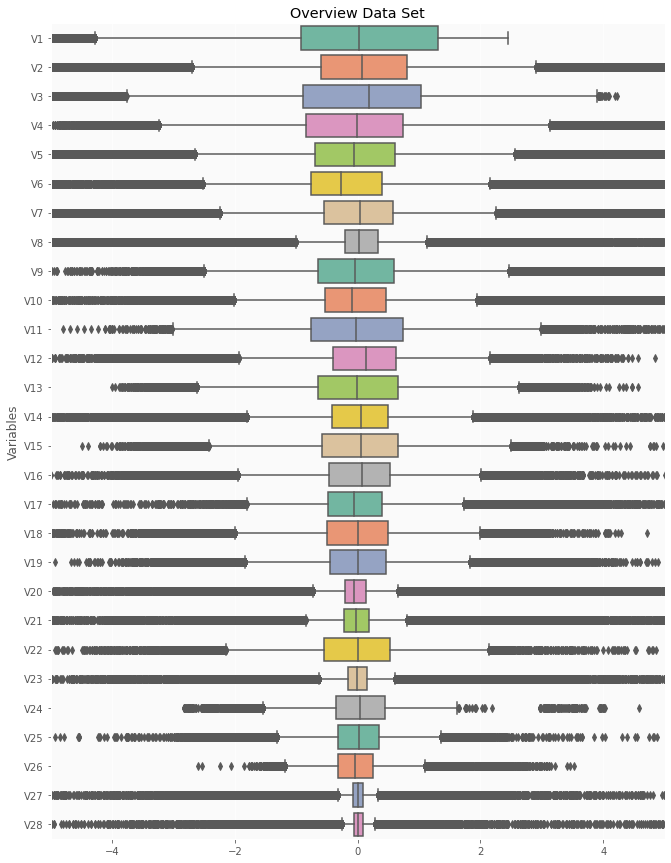

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot') # Using ggplot2 style visuals 
f, ax = plt.subplots(figsize = (11, 15)) # 그래프 사이즈

ax.set_facecolor('#fafafa') # 그래프 색상값
ax.set(xlim = (-5, 5)) # X축 범위
#ax.set(xlim = (-150, 150)) # X축 범위
plt.ylabel('Variables') # Y축 이름
plt.title("Overview Data Set") # 그래프 제목
ax = sns.boxplot(
    data = data.drop(columns = ['Class']), # V1 ~ V28 확인
    orient = 'h', 
    palette = 'Set2'
)

In [20]:
data.loc[data['Class'] == 1] # class가 1인 Row 추출
# 개수 확인: 492 rows -> class imbalenced 상황

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,1


<Figure size 432x288 with 0 Axes>

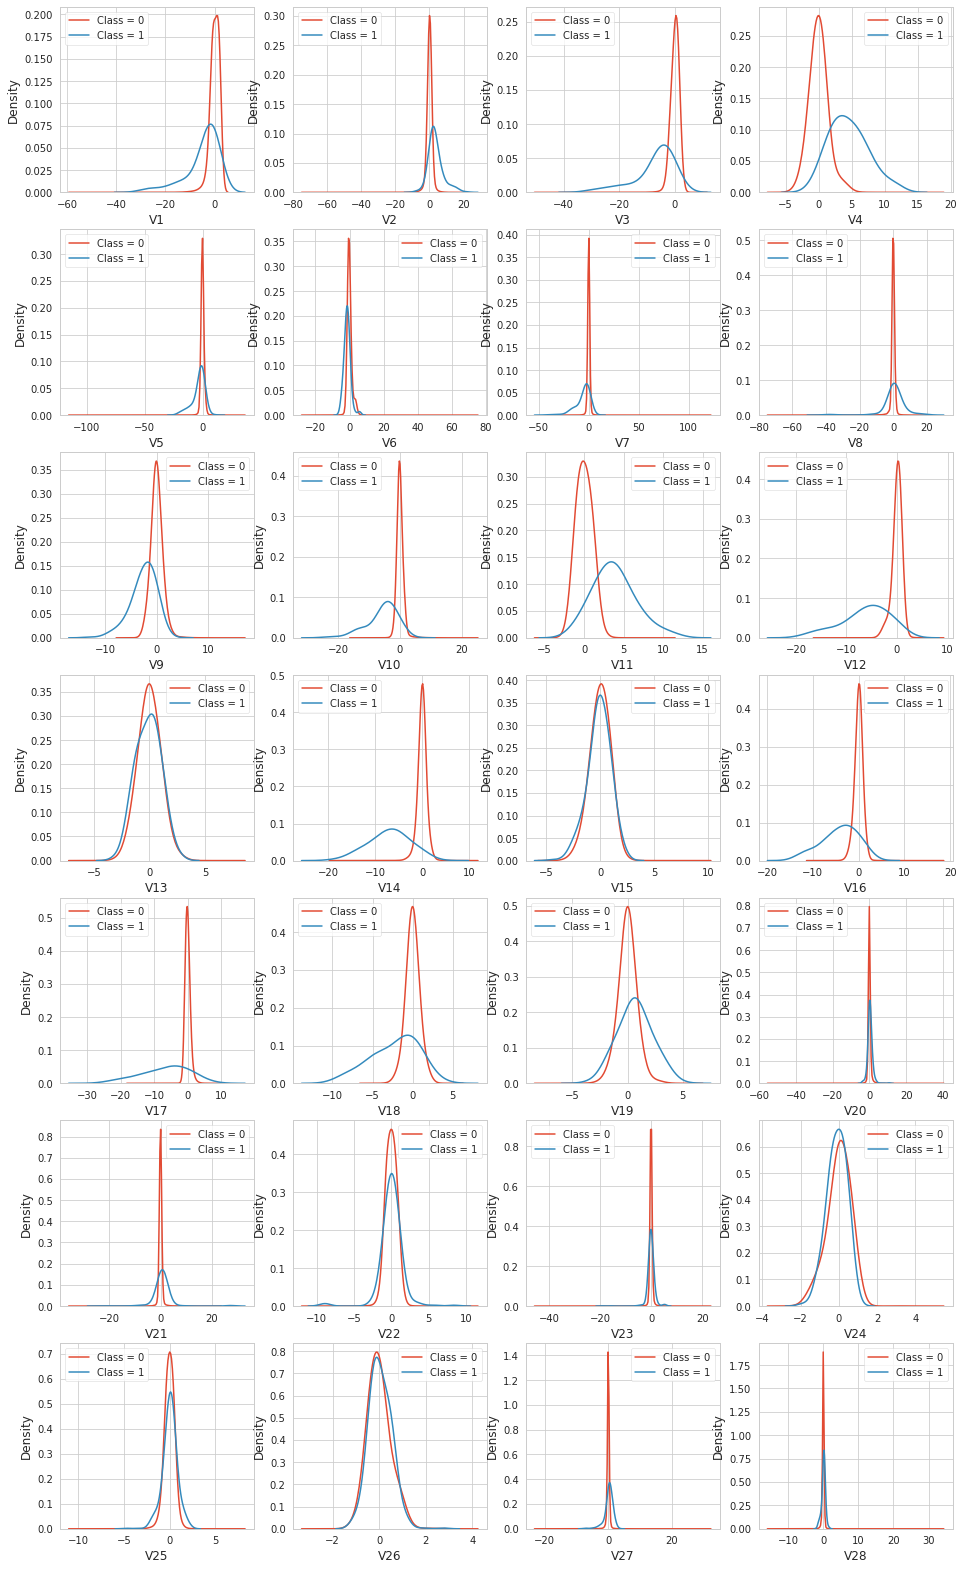

In [21]:
var = data.columns.values[:-1] # V1 ~ V28
i = 0
t0 = data.loc[data['Class'] == 0] # Class : 0 인 행만 추출 --> 정상 거리
t1 = data.loc[data['Class'] == 1] # Class : 1 인 행만 추출 --> Fraud 거래

sns.set_style('whitegrid') # 그래프 스타일 지정
plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16, 28)) # 축 지정

# KDE Plot
# Kernel Desntiy Estimation is a non-parametric estimation of a PDF, 
# Probability Density Function of a random variable. 
# It's a smoothing process of a discontinuous PDF

for idx, feature in enumerate(var):
#     i += 1
    plt.subplot(7, 4, idx+1) # 28개의 그래프
    sns.kdeplot(t0[feature], bw_method = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw_method = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12) # 라벨 속성값
    plt.xticks()
    plt.legend()
plt.show();

#### 각 변수 별 그래프를 타겟변수에 대해서 그려보았을 경우, 차이가 있는 변수들은 다음과 같이 정의할 수 있다.
- Plot의 모양을 보면서 직관석으로 해석
    - 타겟 변수에 대해 분포 차이가 많이 나는 변수 : V4, V11
    - 타겟 변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18
    - 타겟 변수에 대해 분포 차이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10
- Class imbalanced 상황을 생각해 보기
    - 비슷한 유형의 변수가 많다.
    - 특성을 명확히 구분할 수 있는 설명변수가 그리 많지 않다.
    - 이럴 경우 Over Sampling 수행 필요성을 곰곰히 생각해 본다.

In [22]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
X.shape, y.shape

((284807, 28), (284807, 1))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [56]:
# 모델 성능평가 함수를 미리 만들어 놓기
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label:1")
    print(f"Accuracy: {Accuracy:1.5f}")
    print(f"Precision: {Precision: 1.5f}")
    print(f"Recall: { Recall: 1.5f}")
    print(f"F1-Score: {F1_Score: 1.5f}")

# Light GBM을 기본 모델로 설정
- 기존 코드

```
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {
    'max_depth': 10, # 트리 깊이
    'learning_rate': 0.01, # Step Size
    'n_estimators': 50, # Number of trees, 트리 생성 개수
    
    #'objective': 'multiclass', # 목적 함수 <- 원래는 바이너리 문제, 멀티클래스도 상관없음
    # 참고문서: 구글링 -> 'light gbm in python' -> Light GBM 공식 홈페이지 -> Python examples 확인
    # 공식 참고문서: https://lightgbm.readthedocs.io/en/latest/_modules/lightgbm/engine.html#train
    # 유용한 블로그: https://neptune.ai/blog/lightgbm-parameters-guide
    'objective': 'binary', # 목적 함수 
    #'objective': 'multicast', # 목적함수 <- 원래는 바이너리 문제, 멀티클래스도 상관없음         
    
    # 바이너리 클래스의 경우 변수 수는 1 이므로 다음 행 생략
    # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야 함.
    #'num_class': len(set(pd.DataFrame(y_train))) + 1} 
}

lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict) # 모델 분류 결과 평가
```

### 데이터셋 생성

In [57]:
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환

### 파라미터 설정

In [58]:
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'binary'}

In [59]:
 # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
pred= np.repeat(0, len(y_test))
pred[lgb_model.predict(X_test) > 0.5] = 1
model_evaluation(y_test, pred)

/home/kafa46/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Number of positive: 391, number of negative: 227454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 28
[LightGBM] [Info] [binary:BoostF

# Oversampling을 수행
- 추가 성능향상이 가능한지 확인

In [60]:
# 기존 데이터 구조 재확인
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (227845, 28)
y_train dataset:  (227845, 1)
X_test dataset:  (56962, 28)
y_test dataset:  (56962, 1)


## imblearn 설치

In [61]:
!pip install imblearn

In [62]:
from imblearn.over_sampling import SMOTE
print("SMOTE 수행 이전 label '1' 개수: {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("SMOTE 수행 이전 label '0' 개수: {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm = SMOTE(random_state=0, sampling_strategy=0.3) # SMOTE 알고리즘, 비율 증가
# numpy raval() 함수: 1차원 배열로 변환, 참고 블로그 -> https://m.blog.naver.com/wideeyed/221533365486
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("SMOTE 수행 결과 label '1' 개수: {}".format(sum(y_train_res==1)))
print("SMOTE 수행 결과 label '0' 개수': {}".format(sum(y_train_res==0)))



SMOTE 수행 이전 label '1' 개수: [391]
SMOTE 수행 이전 label '0' 개수: [227454] 

SMOTE 수행 결과 label '1' 개수: 68236
SMOTE 수행 결과 label '0' 개수': 227454


In [63]:
print("SMOTE 수행 이전 X_train: {}".format(X_train.shape)) # SMOTE 적용 이전 데이터 형태
print("SMOTE 수행 이전 y_train: {}".format(y_train.shape)) # SMOTE 적용 이전 데이터 형태
print("------" * 10)
print('SMOTE 수행 결과 X_train: {}'.format(X_train_res.shape)) # SMOTE 적용 결과 확인
print('SMOTE 수행 결과 y_train: {}'.format(y_train_res.shape)) # # SMOTE 적용 결과 확인

SMOTE 수행 이전 X_train: (227845, 28)
SMOTE 수행 이전 y_train: (227845, 1)
------------------------------------------------------------
SMOTE 수행 결과 X_train: (295690, 28)
SMOTE 수행 결과 y_train: (295690,)


## 동일한 코드를 이용하여 lightGBM 다시 수행 후 성능향상 확인
- 위에서 사용한 코드 그대로 복.붙 
- 입력값만 달라짐
- SMOTE 전.후 성능지표를 비교
    - 만약 성능이 향상된다면
    - Class imbalanced problem이 Over Sampling으로 어느정도 극복된 것으로 판단.

### 데이터셋 생성

In [64]:
# 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res)) 

### 학습 수행

In [65]:
lgb_param2 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model2 = lgb.train(params = lgb_param2, train_set = lgb_dtrain2) # 학습 진행
lgb_model2_predict = np.argmax(lgb_model2.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model2_predict) # 모델 분류 평가 결과

/home/kafa46/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.4

# Over sampling이 통한다면...
## 그렇다면, Oversampling 크기를 증가시킨다면? (30% $\to$ 60%)
- 성능 변화를 직접 확인

In [66]:
print("SMOTE 수행 이전 label '1' 개수: {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("SMOTE 수행 이전 label '0' 개수: {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm2 = SMOTE(random_state = 0, sampling_strategy=0.6) # SMOTE 알고리즘, 비율 60%
X_train_res2, y_train_res2 = sm2.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("SMOTE 수행 결과 label '1' 개수: {}".format(sum(y_train_res2==1)))
print("SMOTE 수행 결과 label '0' 개수: {}".format(sum(y_train_res2==0)))

SMOTE 수행 이전 label '1' 개수: [391]
SMOTE 수행 이전 label '0' 개수: [227454] 

SMOTE 수행 결과 label '1' 개수: 136472
SMOTE 수행 결과 label '0' 개수: 227454


### 데이터셋 생성

In [67]:
lgb_dtrain3 = lgb.Dataset(data = pd.DataFrame(X_train_res2), label = pd.DataFrame(y_train_res2)) 

### 학습 수행

In [68]:
lgb_param3 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res2))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.

lgb_model3 = lgb.train(params = lgb_param3, train_set = lgb_dtrain3) # 학습 진행
lgb_model3_predict = np.argmax(lgb_model3.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model3_predict) # 모델 분류 평가 결과

/home/kafa46/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 363926, number of used features: 28
[LightGBM] [Info] Start training from score -0.470003
[LightGBM] [Info] Start training from score -0.9

# 극단적인 경우 테스트 (100%)
- 1:1 비율로 Oversampling
- 수행 결과를 30%, 60% 경우의 성능지표와 비교

In [43]:
print("SMOTE 수행 이전 label '1' 개수: {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("SMOTE 수행 이전 label '0' 개수: {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm3 = SMOTE(random_state = 0) # SMOTE 알고리즘, Default: 동등
X_train_res3, y_train_res3 = sm3.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("SMOTE 수행 결과 label '1' 개수: {}".format(sum(y_train_res3==1)))
print("SMOTE 수행 결과 label '0' 개수: {}".format(sum(y_train_res3==0)))

SMOTE 수행 이전 label '1' 개수: [391]
SMOTE 수행 이전 label '0' 개수: [227454] 

SMOTE 수행 결과 label '1' 개수: 227454
SMOTE 수행 결과 label '0' 개수: 227454


### 데이터셋 생성

In [44]:
lgb_dtrain4 = lgb.Dataset(data = pd.DataFrame(X_train_res3), label = pd.DataFrame(y_train_res3))

### 학습 수행

In [45]:
lgb_param4 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res3))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model4 = lgb.train(params = lgb_param4, train_set = lgb_dtrain4) # 학습 진행
lgb_model4_predict = np.argmax(lgb_model4.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model4_predict) # 모델 분류 평가 결과

/home/kafa46/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=10) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=1024) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 28
[LightGBM] [Info] Start training from 

## 다양한 실험 결과 $\to$ 결론: 30%가 가장 적합

In [46]:
# BLSM (Borderline SMOTE)
from imblearn.over_sampling import BorderlineSMOTE
sm4 = BorderlineSMOTE(random_state = 0, sampling_strategy = 0.3) # BLSM 알고리즘 적용
X_train_res4, y_train_res4 = sm4.fit_resample(X_train, y_train.ravel()) # Over Sampling 적용

In [47]:
lgb_dtrain5 = lgb.Dataset(data = pd.DataFrame(X_train_res4), label = pd.DataFrame(y_train_res4)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param5 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'num_leaves': 64,
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res4))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model5 = lgb.train(params = lgb_param5, train_set = lgb_dtrain5) # 학습 진행
lgb_model5_predict = np.argmax(lgb_model5.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model5_predict) # 모델 분류 평가 결과

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.466339
Model_Evaluation with Label:1
Accuracy:  0.9985779993679997
Precision:  0.5684931506849316
Recall:  0.8217821782178217
F1-Score:  0.6720647773279351


# BLSMOTE 보다 기본 SMOTE가 성능이 좋다. 
# 이 경험적 지식을 바탕으로 다양한 모델에 적용해본다
- 선형회귀(로지스틱)
- Random Forest
- CatBoost

In [69]:
# BLSM을 이용해서 Oversampling 한 학습 데이터 셋 : X_train_res2, y_train_res2
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 1e+10) 
# sklearn 의 Logistic Regression은 기본적으로 Ridge 정규화가 포함되어 있기 때문에, 
# 정규화 텀을 억제하는 C를 크게 적용한다 (C:Inverse of regularization strength)
lr_model.fit(X_train_res, y_train_res) # 로지스틱 회귀 모형 학습
lr_predict = lr_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, lr_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy: 0.99259
Precision:  0.18091
Recall:  0.90099
F1-Score:  0.30132


In [70]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                             max_depth = 10, # 트리 최대 깊이 10
                                             random_state = 0) # 시드값 고정
rf_model = random_forest_model.fit(X_train_res, y_train_res) # 학습 진행
rf_predict = rf_model.predict(X_test) # 평가 데이터 예측
model_evaluation(y_test, rf_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy: 0.99923
Precision:  0.74783
Recall:  0.85149
F1-Score:  0.79630


In [71]:
# CatBoost
import catboost as cb
cb_dtrain = cb.Pool(data = X_train_res, label = y_train_res) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
model_evaluation(y_test, cb_model_predict) # 모델 분류 평가 결과

0:	learn: 0.9694376	total: 105ms	remaining: 5.13s
1:	learn: 0.9712774	total: 203ms	remaining: 4.87s
2:	learn: 0.9715750	total: 302ms	remaining: 4.73s
3:	learn: 0.9720484	total: 405ms	remaining: 4.66s
4:	learn: 0.9720450	total: 505ms	remaining: 4.55s
5:	learn: 0.9724441	total: 613ms	remaining: 4.5s
6:	learn: 0.9727688	total: 716ms	remaining: 4.4s
7:	learn: 0.9725354	total: 813ms	remaining: 4.27s
8:	learn: 0.9727282	total: 917ms	remaining: 4.18s
9:	learn: 0.9730190	total: 1.02s	remaining: 4.09s
10:	learn: 0.9729954	total: 1.13s	remaining: 3.99s
11:	learn: 0.9728736	total: 1.23s	remaining: 3.89s
12:	learn: 0.9729142	total: 1.33s	remaining: 3.78s
13:	learn: 0.9728398	total: 1.43s	remaining: 3.68s
14:	learn: 0.9729987	total: 1.54s	remaining: 3.59s
15:	learn: 0.9729480	total: 1.64s	remaining: 3.49s
16:	learn: 0.9727688	total: 1.74s	remaining: 3.38s
17:	learn: 0.9728127	total: 1.84s	remaining: 3.27s
18:	learn: 0.9727045	total: 1.95s	remaining: 3.18s
19:	learn: 0.9728094	total: 2.05s	remaining

# Ensemble의 Ensemble
- 컴퓨터 성능에 따라 실행 시간이 많이 걸릴 수 있습니다. ㅠ
    - 앙상블은 기본적으로 많은 연산 필요
- 성능이 가장 좋은 Random Forest 모델을 바탕으로 진행
- 앙상블의 기본은 기출문제를 잘 푸는 모델(Over fitting 심한 모델 사용) 

In [ ]:
import random
bagging_predict_result = [] # 빈 리스트 생성
number_of_bagging = 5 # Bagging 횟수
for _ in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0]) # 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 0) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict(X_test) # 평가 데이터 예측
    bagging_predict_result.append(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(_+1, "Model Evaluation Result:", "\n") # 전체적인 성능 평가
    model_evaluation(y_test, rf_predict2) # 모델 분류 평가 결과

# Bagging을 바탕으로 예측한 결과값에 대해 다수결로 예측

In [ ]:
bagging_predict = [] # 빈 리스트 생성
for lst2_index in range(X_test.shape[0]): # 테스트 데이터 개수만큼 반복
    temp_predict = [] # 반복문 내 임시 빈 리스트 생성
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    if np.mean(temp_predict) >= 0.5: # 0, 1 이진분류이므로, 예측값의 평균이 0.5보다 크면 1, 아니면 0으로 예측 다수결)
        bagging_predict.append(1)
    elif np.mean(temp_predict) < 0.5: # 예측값의 평균이 0.5보다 낮으면 0으로 결과 저장
        bagging_predict.append(0)
model_evaluation(y_test, bagging_predict) # 모델 분류 평가 결과